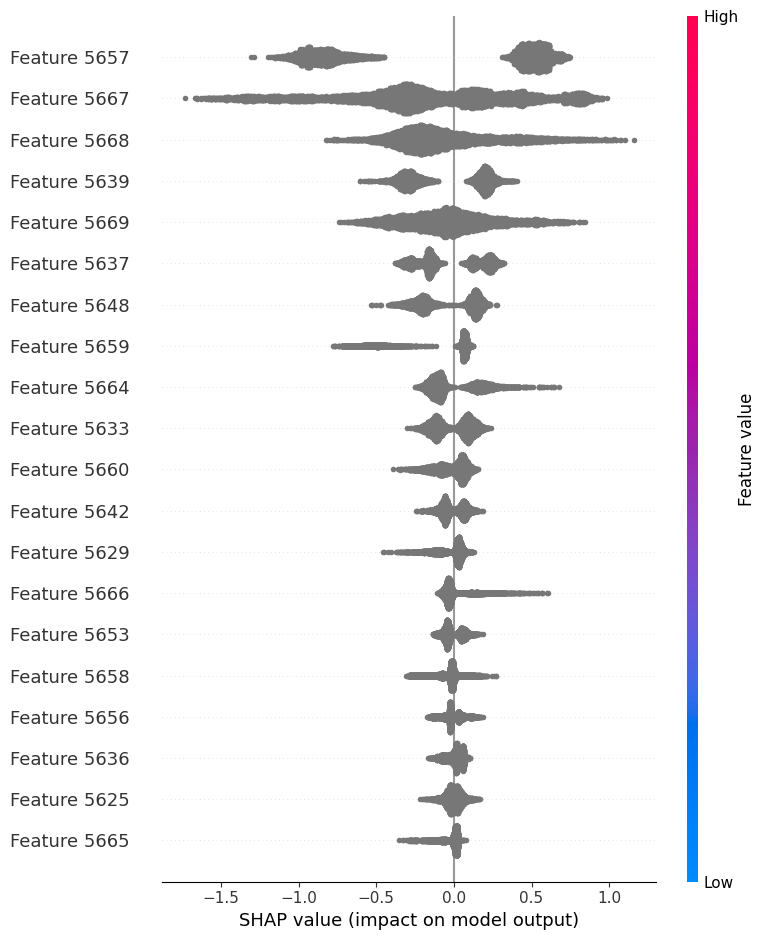

In [7]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt

model = joblib.load("../models/churn_pipeline_xgb.pkl")
df = pd.read_csv("../data/processed/telco_churn_clean.csv")
X = df.drop("Churn", axis=1)

explainer = shap.Explainer(model.named_steps["model"])
shap_values = explainer(model.named_steps["preprocess"].transform(X))

shap.summary_plot(shap_values, show=False)

# Save the currently active figure to a file
plt.savefig("../reports/figures/shap_summary_plot.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()